In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix

data = pd.read_excel('Case Study 2020.xlsx')


In [4]:
data.columns = [c.replace(' ','_') for c in data.columns]

In [5]:
data.drop(['Customer_ID','Arrival_Delay_in_Minutes'],axis=1,inplace=True)    #dropping Customer ID columns

In [6]:
dummies = pd.get_dummies(data.Gender)
dummies.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [7]:
merged = pd.concat([data,dummies], axis = 'columns')
merged.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Female,Male
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,...,4.0,3.0,4.0,4.0,5.0,5.0,25,0,0,1
1,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,...,1.0,5.0,3.0,1.0,4.0,1.0,1,0,0,1
2,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,...,4.0,3.0,4.0,4.0,4.0,5.0,0,1,1,0
3,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,...,2.0,5.0,3.0,1.0,4.0,2.0,11,0,1,0
4,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,...,3.0,4.0,4.0,3.0,3.0,3.0,0,1,0,1


In [8]:
dummies1 = pd.get_dummies(data.Customer_Type)
dummies1.head()

,Loyal Customer,disloyal Customer
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [9]:
merged1 = pd.concat([merged, dummies1], axis = 'columns')
merged1.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Female,Male,Loyal Customer,disloyal Customer
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,...,4.0,4.0,5.0,5.0,25,0,0,1,1,0
1,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,...,3.0,1.0,4.0,1.0,1,0,0,1,0,1
2,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,...,4.0,4.0,4.0,5.0,0,1,1,0,1,0
3,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,...,3.0,1.0,4.0,2.0,11,0,1,0,1,0
4,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,...,4.0,3.0,3.0,3.0,0,1,0,1,1,0


In [10]:
dummies2 = pd.get_dummies(data.Type_of_Travel)
dummies2.head()

,Business travel,Personal Travel
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [11]:
merged2 = pd.concat([merged1,dummies2], axis = 'columns')
merged2.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,...,5.0,5.0,25,0,0,1,1,0,0,1
1,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,...,4.0,1.0,1,0,0,1,0,1,1,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,...,4.0,5.0,0,1,1,0,1,0,1,0
3,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,...,4.0,2.0,11,0,1,0,1,0,1,0
4,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,...,3.0,3.0,0,1,0,1,1,0,1,0


In [12]:
data1 = merged2
data1.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,...,5.0,5.0,25,0,0,1,1,0,0,1
1,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,...,4.0,1.0,1,0,0,1,0,1,1,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,...,4.0,5.0,0,1,1,0,1,0,1,0
3,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,...,4.0,2.0,11,0,1,0,1,0,1,0
4,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,...,3.0,3.0,0,1,0,1,1,0,1,0


In [13]:
data2 = data1.drop(['Gender','Customer_Type', 'Type_of_Travel', 'Male', 'disloyal Customer', 'Business travel'], axis = 1)
data2

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Female,Loyal Customer,Personal Travel
0,13,Eco Plus,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,...,3.0,4.0,4.0,5.0,5.0,25,0,0,1,1
1,25,Business,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,...,5.0,3.0,1.0,4.0,1.0,1,0,0,0,0
2,26,Business,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,...,3.0,4.0,4.0,4.0,5.0,0,1,1,1,0
3,25,Business,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,...,5.0,3.0,1.0,4.0,2.0,11,0,1,1,0
4,61,Business,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,...,4.0,4.0,3.0,3.0,3.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,34,Business,526,3.0,3.0,3.0,1.0,4.0,3.0,4.0,...,2.0,4.0,4.0,5.0,4.0,0,0,0,0,0
129876,23,Business,646,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,5.0,5.0,5.0,5.0,4.0,0,1,0,1,0
129877,17,Eco,828,2.0,5.0,1.0,5.0,2.0,1.0,2.0,...,3.0,4.0,5.0,4.0,2.0,0,0,1,1,1
129878,14,Business,1127,3.0,3.0,3.0,3.0,4.0,4.0,4.0,...,2.0,5.0,4.0,5.0,4.0,0,1,0,1,0


In [14]:
data_reordered = ['Female', 'Loyal Customer', 'Age', 'Personal Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'satisfaction']

data3 = data2[data_reordered]
data3

,Female,Loyal Customer,Age,Personal Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction
0,0,1,13,1,Eco Plus,460,3.0,4.0,3.0,1.0,...,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,0
1,0,0,25,0,Business,235,3.0,2.0,3.0,3.0,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,0
2,1,1,26,0,Business,1142,2.0,2.0,2.0,2.0,...,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,1
3,1,1,25,0,Business,562,2.0,5.0,5.0,5.0,...,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,0
4,0,1,61,0,Business,214,3.0,3.0,3.0,3.0,...,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,0,34,0,Business,526,3.0,3.0,3.0,1.0,...,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0,0
129876,0,1,23,0,Business,646,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0,1
129877,1,1,17,1,Eco,828,2.0,5.0,1.0,5.0,...,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0,0
129878,0,1,14,0,Business,1127,3.0,3.0,3.0,3.0,...,4.0,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0,1


In [15]:
label_encoder = preprocessing.LabelEncoder()
data3['Class'] = label_encoder.fit_transform(data3['Class'])
data3['Class'].unique()

data3

,Female,Loyal Customer,Age,Personal Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction
0,0,1,13,1,2,460,3.0,4.0,3.0,1.0,...,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,0
1,0,0,25,0,0,235,3.0,2.0,3.0,3.0,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,0
2,1,1,26,0,0,1142,2.0,2.0,2.0,2.0,...,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,1
3,1,1,25,0,0,562,2.0,5.0,5.0,5.0,...,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,0
4,0,1,61,0,0,214,3.0,3.0,3.0,3.0,...,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,0,34,0,0,526,3.0,3.0,3.0,1.0,...,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0,0
129876,0,1,23,0,0,646,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0,1
129877,1,1,17,1,1,828,2.0,5.0,1.0,5.0,...,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0,0
129878,0,1,14,0,0,1127,3.0,3.0,3.0,3.0,...,4.0,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0,1


In [16]:
missing_values = data3.isnull().sum()
missing_values

Female                               0
Loyal Customer                       0
Age                                  0
Personal Travel                      0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                4
Departure/Arrival_time_convenient    4
Ease_of_Online_booking               3
Gate_location                        8
Food_and_drink                       5
Online_boarding                      6
Seat_comfort                         1
Inflight_entertainment               4
On-board_service                     3
Leg_room_service                     2
Baggage_handling                     2
Checkin_service                      3
Inflight_service                     1
Cleanliness                          2
Departure_Delay_in_Minutes           0
satisfaction                         0
dtype: int64

In [17]:
data4 = data3.dropna()
data4.shape

(129840, 22)

In [18]:
missing_values = data4.isnull().sum()
missing_values

Female                               0
Loyal Customer                       0
Age                                  0
Personal Travel                      0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
satisfaction                         0
dtype: int64

In [19]:
z1 = np.abs(stats.zscore(data4))   #outliers detection and removal
print(z1)

[[1.01491404 0.47336478 1.74807774 ... 1.30447052 0.27015388 0.87654722]
 [1.01491404 2.11253571 0.95438331 ... 1.74049593 0.36019438 0.87654722]
 [0.98530512 0.47336478 0.88824211 ... 1.30447052 0.38645889 1.14083985]
 ...
 [0.98530512 0.47336478 1.48351293 ... 0.97925432 0.38645889 0.87654722]
 [1.01491404 0.47336478 1.68193653 ... 0.54322891 0.38645889 1.14083985]
 [0.98530512 0.47336478 0.17001712 ... 1.74049593 0.38645889 0.87654722]]


In [20]:
threshold = 3
print(np.where(z1>3))

(array([   138,    148,    238, ..., 129621, 129635, 129806], dtype=int64), array([20, 20, 20, ..., 20, 20, 20], dtype=int64))


In [21]:
data4 = data4[(z1<3).all(axis=1)]
data4

,Female,Loyal Customer,Age,Personal Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction
0,0,1,13,1,2,460,3.0,4.0,3.0,1.0,...,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,0
1,0,0,25,0,0,235,3.0,2.0,3.0,3.0,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,0
2,1,1,26,0,0,1142,2.0,2.0,2.0,2.0,...,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,1
3,1,1,25,0,0,562,2.0,5.0,5.0,5.0,...,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,0
4,0,1,61,0,0,214,3.0,3.0,3.0,3.0,...,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,0,34,0,0,526,3.0,3.0,3.0,1.0,...,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0,0
129876,0,1,23,0,0,646,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0,1
129877,1,1,17,1,1,828,2.0,5.0,1.0,5.0,...,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0,0
129878,0,1,14,0,0,1127,3.0,3.0,3.0,3.0,...,4.0,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0,1


# FEATURE SELECTION

In [22]:
X_categorical = data4[['Female', 'Loyal Customer', 'Personal Travel', 'Class', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness']]

X_categorical.head()

,Female,Loyal Customer,Personal Travel,Class,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
0,0,1,1,2,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0
1,0,0,0,0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0
2,1,1,0,0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0
3,1,1,0,0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0
4,0,1,0,0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0


In [23]:
y = data4['satisfaction']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

In [24]:
fs = SelectKBest(score_func = chi2, k = 'all')
fs.fit(X_categorical, y)
X_fs = fs.transform(X_categorical)

Feature 0: 8.306156
Feature 1: 810.840446
Feature 2: 17806.867125
Feature 3: 16632.467987
Feature 4: 6590.518429
Feature 5: 281.518859
Feature 6: 2586.992896
Feature 7: 0.366700
Feature 8: 2848.831947
Feature 9: 18050.848444
Feature 10: 7719.008511
Feature 11: 10801.638498
Feature 12: 6653.897574
Feature 13: 6589.579490
Feature 14: 3049.578906
Feature 15: 3336.843734
Feature 16: 2831.525074
Feature 17: 6184.697870


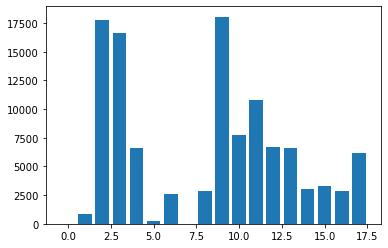

In [25]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i,fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [26]:
X_numerical = data4[['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes']]

X_numerical.head()

,Age,Flight_Distance,Departure_Delay_in_Minutes
0,13,460,25
1,25,235,1
2,26,1142,0
3,25,562,11
4,61,214,0


In [28]:
fs1 = SelectKBest(score_func = f_classif, k = 'all')
fs1.fit(X_numerical, y)
X_fs1 = fs1.transform(X_numerical)

Feature 0: 2327.833273
Feature 1: 12465.945479
Feature 2: 505.042088


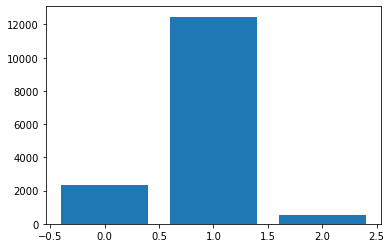

In [29]:
for i in range(len(fs1.scores_)):
    print('Feature %d: %f' % (i,fs1.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs1.scores_))], fs1.scores_)
plt.show()

In [30]:
data4.head()

,Female,Loyal Customer,Age,Personal Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction
0,0,1,13,1,2,460,3.0,4.0,3.0,1.0,...,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,0
1,0,0,25,0,0,235,3.0,2.0,3.0,3.0,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,0
2,1,1,26,0,0,1142,2.0,2.0,2.0,2.0,...,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,1
3,1,1,25,0,0,562,2.0,5.0,5.0,5.0,...,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,0
4,0,1,61,0,0,214,3.0,3.0,3.0,3.0,...,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,1


In [32]:
data5 = data4.drop(['Female', 'Loyal Customer', 'Gate_location','Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
                   'Age','Departure_Delay_in_Minutes'], axis = 1)

data5.shape

(126984, 15)

# Standardization

In [33]:
data5['Flight_Distance'] -= data5['Flight_Distance'].mean()
data5['Flight_Distance'] /= data5['Flight_Distance'].std()

In [34]:
data5

,Personal Travel,Class,Flight_Distance,Inflight_wifi_service,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
0,1,2,-0.731948,3.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,0
1,0,0,-0.958288,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,0
2,0,0,-0.045886,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,1
3,0,0,-0.629340,2.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,0
4,0,0,-0.979413,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,0,-0.665554,3.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0
129876,0,0,-0.544840,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,1
129877,1,1,-0.361756,2.0,2.0,1.0,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0
129878,0,0,-0.060975,3.0,4.0,4.0,4.0,4.0,3.0,2.0,5.0,4.0,5.0,4.0,1


In [35]:
X = data5.iloc[:, 0:14]
y = data5.iloc[:, 14]

# k fold Cross Validation

In [36]:
kf = KFold(n_splits = 10)

In [37]:
score1 = cross_val_score(LogisticRegression(),X,y,cv=kf)
score1

array([0.85802032, 0.85683912, 0.85581542, 0.85494921, 0.86045046,
       0.85548905, 0.86021421, 0.86092298, 0.85651284, 0.85367774])

In [38]:
score1.mean()

0.8572891351073799

In [39]:
score2 = cross_val_score(KNeighborsClassifier(n_neighbors=7),X,y,cv=kf)
score2

array([0.93109694, 0.93062446, 0.93196315, 0.92810458, 0.93038274,
       0.92935895, 0.93030398, 0.93369034, 0.9337691 , 0.93022523])

In [40]:
score2.mean()

0.9309519468489743

In [41]:
score3 = cross_val_score(SVC(),X,y,cv=kf)
score3

array([0.9373179 , 0.93810536, 0.9373179 , 0.93794787, 0.94101433,
       0.94014805, 0.93967554, 0.94203812, 0.94117184, 0.93920302])

In [43]:
score3.mean()

0.9393939936286767